In [ ]:
import pandas  as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
path="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headernames=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset=pd.read_csv(path,names=headernames)

In [ ]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.shape

(150, 5)

In [ ]:
dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [ ]:
if dataset.duplicated().any():
  print("duplicate present")
else:
  print("no duplicates are present")

duplicate present


In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
if dataset.duplicates().any():
  print("yes")
else:
  print("no")

In [ ]:
dataset.shape

(147, 5)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  147 non-null    float64
 1   sepal-width   147 non-null    float64
 2   petal-length  147 non-null    float64
 3   petal-width   147 non-null    float64
 4   Class         147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [ ]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
x=dataset.iloc[:,:-1] #	sepal-length	sepal-width	petal-length	petal-width
y=dataset.iloc[:,4]# class

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
scaler = StandardScaler()#standardize the features by removing the mean and scaling to unit variance

In [ ]:
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
accuracy_rate=[]
for i in range(1,40,2):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')# cv=10 (10-fold cross-validation)
  accuracy_rate.append(score.mean())
print("Final Accuracy",accuracy_rate)

Final Accuracy [0.9234848484848482, 0.9325757575757574, 0.9325757575757574, 0.9409090909090908, 0.949242424242424, 0.949242424242424, 0.9575757575757574, 0.9666666666666666, 0.9583333333333333, 0.9416666666666667, 0.9333333333333332, 0.9416666666666667, 0.9325757575757574, 0.915151515151515, 0.906060606060606, 0.9143939393939393, 0.8893939393939394, 0.8810606060606061, 0.8727272727272727, 0.8560606060606061]


Text(0, 0.5, 'Accuracy Rate')

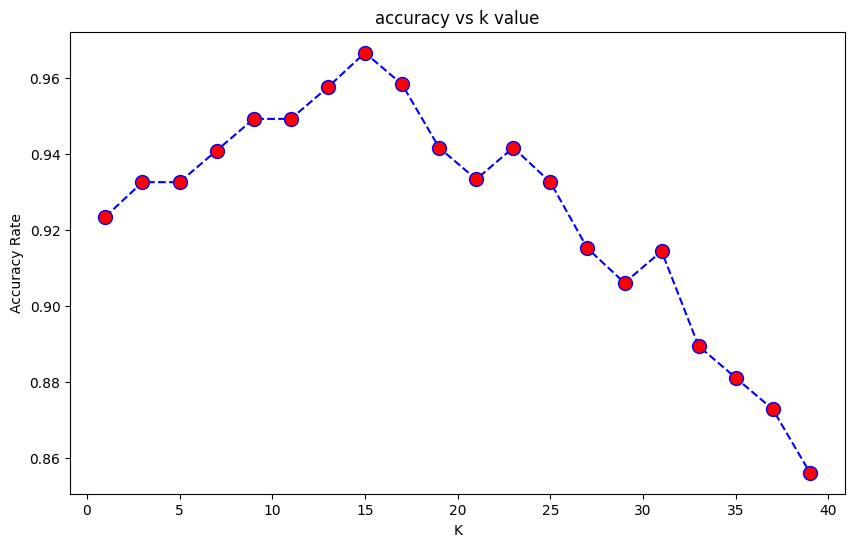

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40,2),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('accuracy vs k value')
plt.xlabel("K")
plt.ylabel("Accuracy Rate")

In [ ]:
error_rate=[1-x for x in accuracy_rate]
error_rate

[0.07651515151515176,
 0.06742424242424261,
 0.06742424242424261,
 0.059090909090909194,
 0.050757575757576,
 0.050757575757576,
 0.042424242424242586,
 0.03333333333333344,
 0.04166666666666674,
 0.05833333333333335,
 0.06666666666666676,
 0.05833333333333335,
 0.06742424242424261,
 0.08484848484848495,
 0.09393939393939399,
 0.08560606060606069,
 0.1106060606060606,
 0.1189393939393939,
 0.12727272727272732,
 0.14393939393939392]

Text(0, 0.5, 'Error Rate')

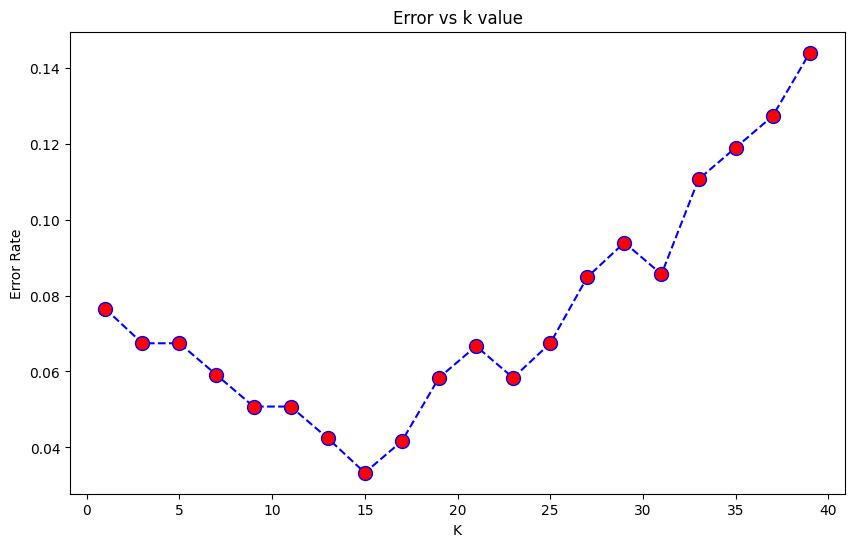

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40,2),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error vs k value')
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=11)


In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
result=confusion_matrix(y_test,y_pred)
result

array([[ 7,  0,  0],
       [ 0, 15,  0],
       [ 0,  0,  8]])

In [ ]:
result1=classification_report(y_test,y_pred)
print(result1)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
result2=accuracy_score(y_test,y_pred)
result2

1.0